<a href="https://colab.research.google.com/github/sundeepmuddana/DEVCODEEDUR/blob/master/sundeepdhamodhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

locations = ['79936', '10001', '30301', '60601', '90001']
departments = ['Electronics', 'Appliances']
categories = {
    'Electronics': ['Mobile Phones', 'Laptops', 'Tablets'],
    'Appliances': ['Refrigerators', 'Washing Machines', 'Microwaves']
}
products = {
    'Mobile Phones': [
        {'name': 'iPhone 14', 'brand': 'Apple', 'size': '128 GB', 'price': 25000.99},
        {'name': 'Galaxy S23', 'brand': 'Samsung', 'size': '128 GB', 'price': 40000.99},
        {'name': 'Pixel 7', 'brand': 'Google', 'size': '128 GB', 'price': 35000.99}
    ],
    'Laptops': [
        {'name': 'MacBook Air', 'brand': 'Apple', 'size': '256 GB', 'price': 70000.99},
        {'name': 'XPS 13', 'brand': 'Dell', 'size': '256 GB', 'price': 80000.99},
        {'name': 'ThinkPad X1', 'brand': 'Lenovo', 'size': '512 GB', 'price': 90000.99}
    ],
    'Tablets': [
        {'name': 'iPad Pro', 'brand': 'Apple', 'size': '128 GB', 'price': 45000.99},
        {'name': 'Galaxy Tab S8', 'brand': 'Samsung', 'size': '128 GB', 'price': 35000.99},
        {'name': 'Surface Pro 9', 'brand': 'Microsoft', 'size': '256 GB', 'price': 32000.99}
    ],
    'Refrigerators': [
        {'name': 'French Door Refrigerator', 'brand': 'LG', 'size': '25 Cu. Ft.', 'price': 75000.99},
        {'name': 'Side-by-Side Refrigerator', 'brand': 'Samsung', 'size': '28 Cu. Ft.', 'price': 85000.99},
        {'name': 'Top Freezer Refrigerator', 'brand': 'Whirlpool', 'size': '20 Cu. Ft.', 'price': 65000.99}
    ],
    'Washing Machines': [
        {'name': 'Front Load Washer', 'brand': 'LG', 'size': '4.5 Cu. Ft.', 'price': 25000.99},
        {'name': 'Top Load Washer', 'brand': 'Samsung', 'size': '5.0 Cu. Ft.', 'price': 15000.99},
        {'name': 'Portable Washer', 'brand': 'GE', 'size': '2.8 Cu. Ft.', 'price': 10000.99}
    ],
    'Microwaves': [
        {'name': 'Over-the-Range Microwave', 'brand': 'GE', 'size': '1.7 Cu. Ft.', 'price': 12000.99},
        {'name': 'Countertop Microwave', 'brand': 'Panasonic', 'size': '1.2 Cu. Ft.', 'price': 13000.99},
        {'name': 'Built-in Microwave', 'brand': 'Bosch', 'size': '1.6 Cu. Ft.', 'price': 18000.99}
    ]
}

num_rows = 10000

single_sale_event = 'Festive Offer'
demand_levels = ['High', 'Low']
inventory_levels = ['High', 'Medium', 'Low']
competitor_pricing_levels = ['High', 'Low']
time_of_day = ['8AM-10AM', '10AM-12PM', '12PM-2PM', '2PM-4PM', '4PM-6PM', '6PM-8PM']

rows = []
for i in range(num_rows):
    location = random.choice(locations)
    department = random.choice(departments)
    category = random.choice(categories[department])

    if category not in products:
        print(f"Category '{category}' not found in products dictionary.")
        continue

    product = random.choice(products[category])
    row = {
        'SHIPPING_LOCATION': location,
        'DEPARTMENT': department,
        'CATEGORY': category,
        'SUBCATEGORY': np.nan,
        'BREADCRUMBS': f'{department}/{category}',
        'SKU': random.randint(100000000, 999999999),
        'PRODUCT_URL': f'https://www.walmart.com/ip/{product["name"].replace(" ", "-")}',
        'PRODUCT_NAME': f'{product["brand"]} {product["name"]}, {product["size"]}',
        'BRAND': product['brand'],
        'PRICE_RETAIL': product['price'],
        'PRICE_CURRENT': product['price'],
        'PRODUCT_SIZE': product['size'].split(' ')[0],
        'PROMOTION': np.nan,
        'RunDate': (datetime(2022, 1, 1) + timedelta(days=random.randint(0, 365))).strftime('%Y-%m-%d %H:%M:%S'),
        'SALE_EVENT': single_sale_event,
        'DEMAND': random.choice(demand_levels),
        'INVENTORY_LEVEL': random.choice(inventory_levels),
        'COMPETITOR_PRICING': random.choice(competitor_pricing_levels),
        'TIME_OF_DAY': random.choice(time_of_day)
    }
    rows.append(row)

df = pd.DataFrame(rows)

df['RunDate'] = pd.to_datetime(df['RunDate'])

df.to_csv('retail_large_sample_data_with_features.csv', index=False)

print("Large sample CSV file with retail products and additional features created successfully.")

Large sample CSV file with retail products and additional features created successfully.


In [2]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/content/retail_large_sample_data_with_features.csv')

# Extract month
df['Month'] = pd.to_datetime(df['RunDate']).dt.month

# Fill NaN values in the 'PROMOTION' column
df.fillna({'PROMOTION': 'None'}, inplace=True)

# Add indicators for mobile phones only
df['IsMobilePhone'] = (df['CATEGORY'] == 'Mobile Phones').astype(int)

# Update promotion based on time of day and additional features
def update_promotion(row):
    if row['IsMobilePhone']:
        if row['DEMAND'] == 'High':
            if row['INVENTORY_LEVEL'] == 'Low':
                return 'High Demand, Low Inventory Discount'
            elif row['COMPETITOR_PRICING'] == 'High':
                return 'High Demand, High Competitor Pricing Discount'

        if 'PM' in row['TIME_OF_DAY'] and row['COMPETITOR_PRICING'] == 'Low':
            return 'Evening Special Discount'

    return 'Regular'

df['PROMOTION'] = df.apply(update_promotion, axis=1)

# Calculate price change and days since last price update
df['Price_Change'] = df.groupby('SKU')['PRICE_CURRENT'].pct_change().fillna(0)
df['Days_Since_Last_Price_Update'] = (pd.to_datetime(df['RunDate']) - pd.to_datetime(df.groupby('SKU')['RunDate'].shift(1))).dt.days.fillna(0)

# Save the updated data to a new CSV file
df.to_csv('updated_walmart_data_with_full_features_promotions.csv', index=False)

print("Data preprocessing with additional features completed successfully.")

Data preprocessing with additional features completed successfully.


In [3]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
df = pd.read_csv('updated_walmart_data_with_full_features_promotions.csv')

# Feature engineering
df['Price_Retail_Log'] = np.log1p(df['PRICE_RETAIL'])
df['Price_Current_Log'] = np.log1p(df['PRICE_CURRENT'])
df['Product_Length'] = df['PRODUCT_NAME'].apply(lambda x: len(x))
df['IsHighPrice'] = (df['PRICE_RETAIL'] > df['PRICE_RETAIL'].median()).astype(int)


# Adding random noise to PRICE_CURRENT to simulate variability
np.random.seed(42)
noise = np.random.normal(0, 0.1 * df['PRICE_CURRENT'].mean(), df.shape[0])
df['PRICE_CURRENT'] = df['PRICE_CURRENT'] - noise

# Ensure PRICE_CURRENT is always less than PRICE_RETAIL
df['PRICE_CURRENT'] = np.where(df['PRICE_CURRENT'] >= df['PRICE_RETAIL'], df['PRICE_RETAIL'] - 0.01, df['PRICE_CURRENT'])

#label encoding
df['DEMAND']= label_encoder.fit_transform(df['DEMAND'])
df['INVENTORY_LEVEL']= label_encoder.fit_transform(df['INVENTORY_LEVEL'])
df['COMPETITOR_PRICING']= label_encoder.fit_transform(df['COMPETITOR_PRICING'])
df['TIME_OF_DAY']= label_encoder.fit_transform(df['TIME_OF_DAY'])
df["SALE_EVENT"]=label_encoder.fit_transform(df['SALE_EVENT'])
df["IsMobilePhone"]=label_encoder.fit_transform(df['IsMobilePhone'])

# Define features and target variable
features = ['PRICE_RETAIL', 'Days_Since_Last_Price_Update',
            'Price_Retail_Log', 'Price_Current_Log','IsHighPrice',
            'DEMAND', 'INVENTORY_LEVEL', 'COMPETITOR_PRICING', 'TIME_OF_DAY', 'SALE_EVENT','IsMobilePhone']



#x=df[features]

X=df[features]  # Convert categorical features to dummy variables
y = df['PRICE_CURRENT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Increased n_estimators for better performance
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor - Mean Squared Error: {mse:.4f}")
print(f"Random Forest Regressor - R^2 Score: {r2:.4f}")

# Save the model as a pickle file
with open('random_forest_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Random Forest model saved successfully.")

Random Forest Regressor - Mean Squared Error: 7287926.9880
Random Forest Regressor - R^2 Score: 0.9900
Random Forest model saved successfully.


In [19]:
df.dtypes


,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,...,IsFlashSale,IsEndOfSeasonSale,IsMobilePhone,Price_Change,Days_Since_Last_Price_Update,Price_Retail_Log,Price_Current_Log,Product_Length,IsHighPrice,Adjusted_Price
0,30301,Electronics,Laptops,NaN,Electronics/Laptops,406096322,https://www.walmart.com/ip/XPS-13,"Dell XPS 13, 256 GB",Dell,80000.99,...,1,0,0,0.0,0.0,11.289807,11.289807,19,1,80000.990
1,10001,Appliances,Microwaves,NaN,Appliances/Microwaves,491770594,https://www.walmart.com/ip/Over-the-Range-Micr...,"GE Over-the-Range Microwave, 1.7 Cu. Ft.",GE,12000.99,...,0,0,0,0.0,0.0,9.392828,9.392828,40,0,12000.990
2,60601,Appliances,Microwaves,NaN,Appliances/Microwaves,579193824,https://www.walmart.com/ip/Over-the-Range-Micr...,"GE Over-the-Range Microwave, 1.7 Cu. Ft.",GE,12000.99,...,0,0,0,0.0,0.0,9.392828,9.392828,40,0,12000.990
3,10001,Electronics,Tablets,NaN,Electronics/Tablets,951168744,https://www.walmart.com/ip/Surface-Pro-9,"Microsoft Surface Pro 9, 256 GB",Microsoft,32000.99,...,0,0,0,0.0,0.0,10.373553,10.373553,31,0,32000.990
4,90001,Appliances,Washing Machines,NaN,Appliances/Washing Machines,150360452,https://www.walmart.com/ip/Top-Load-Washer,"Samsung Top Load Washer, 5.0 Cu. Ft.",Samsung,15000.99,...,0,1,0,0.0,0.0,9.615938,9.615938,36,0,13500.891


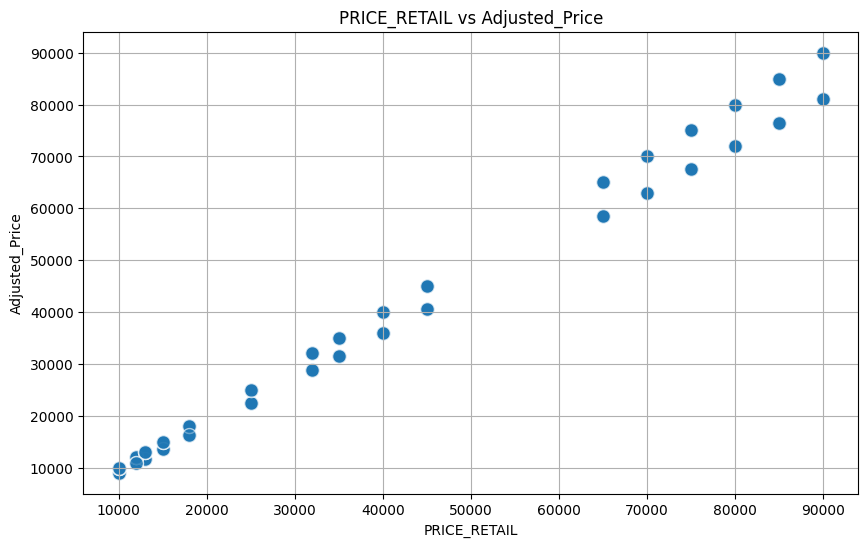

In [21]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PRICE_RETAIL'], df['Adjusted_Price'], alpha=0.6, edgecolors='w', s=100)
plt.title('PRICE_RETAIL vs Adjusted_Price')
plt.xlabel('PRICE_RETAIL')
plt.ylabel('Adjusted_Price')
plt.grid(True)
plt.show()

In [22]:
# Example adjustment logic (assuming a 10% discount during any sale)
df['Adjusted_Price'] = df['PRICE_RETAIL']

# Apply a 10% discount if any sale flag is true
sale_flags = ['IsEndOfSeasonSale']
df['Adjusted_Price'] = df.apply(lambda row: row['PRICE_RETAIL'] * 0.9 if any(row[flag] == 1 for flag in sale_flags) else row['PRICE_RETAIL'], axis=1)

In [23]:
import plotly.graph_objects as go

data = df
# For Historical Pricing
historical_profitable = data[data['Adjusted_Price'] > data['PRICE_CURRENT']]
historical_loss = data[data['Adjusted_Price'] < data['PRICE_CURRENT']]

# For Dynamic Pricing
dynamic_profitable = data[data['PRICE_CURRENT'] > data['PRICE_RETAIL']]
dynamic_loss = data[data['PRICE_CURRENT'] < data['PRICE_RETAIL']]

# Calculate counts for Historical Pricing
historical_profitable_count = len(dynamic_profitable)
historical_loss_count = len(dynamic_loss)

# Calculate counts for Dynamic Pricing
dynamic_profitable_count = len(historical_profitable)
dynamic_loss_count = len(historical_loss)

# Create the donut chart for Dynamic Pricing
fig2 = go.Figure(data=[go.Pie(labels=['Loss Dynamic Sales','Profitable Dynamic Sales'],
                              values=[dynamic_profitable_count, dynamic_loss_count],
                              hole=.5)])

# Create the donut chart for Historical Pricing
fig1 = go.Figure(data=[go.Pie(labels=['Loss Historical Sales','Profitable Historical Sales'],
                              values=[historical_profitable_count, historical_loss_count],
                              hole=.5)])

# Update layout for Historical Pricing chart
fig1.update_layout(title='Profitability of MobilePhone: Historical Pricing')

# Show the plot
fig1.show()

# Update layout for Dynamic Pricing chart
fig2.update_layout(title='Profitability of MobilePhone: Dynamic Pricing')

# Show the plot
fig2.show()

In [5]:
!pip install gradio
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [26]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle
import shap  # Import SHAP library
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the trained model
with open('random_forest_price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Initialize SHAP explainer for the model
explainer = shap.Explainer(model)

# Load historical data (this could be loaded from a CSV file or database)
# Example historical data; in real scenarios, replace with actual data
historical_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Price': np.random.uniform(8000, 12000, 100),
    'Cost': np.random.uniform(6000, 9000, 100),  # Assume we have cost data
    'Demand': np.random.choice(['High', 'Low'], 100),
    'Inventory_Level': np.random.choice(['High', 'Medium', 'Low'], 100)
})

# Calculate profit/loss
historical_data['Profit_Loss'] = historical_data['Price'] - historical_data['Cost']  # Calculate daily profit or loss

# Function to make predictions, adjust prices, and generate historical graph
def predict_price(price_retail, is_mobile_phone, sale_event, price_change, days_since_last_update, is_high_price, demand, inventory_level, competitor_pricing, time_of_day):
    # Feature engineering
    price_retail_log = np.log1p(price_retail)
    price_current_log = np.log1p(price_retail)  # Assuming current price starts as retail price

    # Extract recent historical pricing data to compute moving average or trends
    recent_data = historical_data.tail(7)  # Last 7 days
    moving_avg_price = recent_data['Price'].mean()
    price_trend = recent_data['Price'].pct_change().mean()  # Average daily percentage change

    # Prepare features for prediction
    features = pd.DataFrame({
        'PRICE_RETAIL': [price_retail],
        'IsMobilePhone': [is_mobile_phone],
        'SaleEvent': [sale_event],
        'Days_Since_Last_Price_Update': [days_since_last_update],
        'Price_Retail_Log': [price_retail_log],
        'Price_Current_Log': [price_current_log],
        'IsHighPrice': [is_high_price],
        'DEMAND': [demand],
        'INVENTORY_LEVEL': [inventory_level],
        'COMPETITOR_PRICING': [competitor_pricing],
        'TIME_OF_DAY': [time_of_day],
        'Moving_Avg_Price': [moving_avg_price],
        'Price_Trend': [price_trend]
    })

    # Apply label encoding to categorical features
    label_encoders = {}
    categorical_columns = ['IsMobilePhone', 'SaleEvent', 'DEMAND', 'INVENTORY_LEVEL', 'COMPETITOR_PRICING', 'TIME_OF_DAY']
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        features[col] = label_encoders[col].fit_transform(features[col])

    # Ensure all columns match the model input
    for column in model.feature_names_in_:
        if column not in features.columns:
            features[column] = 0
    features = features[model.feature_names_in_]

    # Make prediction
    predicted_price = model.predict(features)[0]

    # Adjust predicted price based on prioritized business conditions
    adjusted_price = predicted_price

    # Determine the primary recommendation based on the combination of factors
    recommendation = "Maintain current pricing strategy."

    if sale_event:
        adjusted_price *= 0.90
        recommendation = "Decrease price by 10% to boost sales during the sale event."
    elif inventory_level == 'High':
        adjusted_price *= 0.90
        recommendation = "Decrease price by 10% to clear high inventory."
    elif is_high_price:
        adjusted_price *= 1.10
        recommendation = "Increase price by 10% to reinforce the premium value of the product."
    elif demand == 'High':
        adjusted_price *= 1.10
        recommendation = "Increase price by 10% due to high demand."
    elif competitor_pricing == 'Low':
        adjusted_price *= 0.95
        recommendation = "Decrease price by 5% to stay competitive with lower-priced competitors."
    elif is_mobile_phone:
        adjusted_price *= 1.05
        recommendation = "Increase price by 5% as it is a mobile phone."
    elif time_of_day in ['6AM-9AM', '9PM-12AM']:
        adjusted_price *= 0.97
        recommendation = "Decrease price by 3% during off-peak hours."

    # Compute SHAP values
    shap_values = explainer(features)

    # Create SHAP plot
    shap.initjs()
    plt.figure(figsize=(6, 4))
    shap.waterfall_plot(shap.Explanation(values=shap_values[0].values,
                                         base_values=shap_values[0].base_values,
                                         data=features.iloc[0].values,
                                         feature_names=features.columns))
    plt.savefig('shap_plot.png', dpi=70)  # Save the SHAP plot as an image

    # Generate a plot for historical pricing data
    plt.figure(figsize=(10, 4))
    plt.plot(historical_data['Date'], historical_data['Price'], label='Price History')
    plt.title('Historical Pricing Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('historical_plot.png', dpi=70)  # Save the historical plot as an image

    # Generate a plot for profit/loss data
    plt.figure(figsize=(10, 4))
    plt.plot(historical_data['Date'], historical_data['Profit_Loss'], color='green', label='Profit/Loss')
    plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0 to indicate break-even
    plt.title('Profit/Loss Over Time')
    plt.xlabel('Date')
    plt.ylabel('Profit/Loss')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('profit_loss_plot.png', dpi=70)  # Save the profit/loss plot as an image

    # Calculate summary statistics for profit/loss
    total_profit_loss = historical_data['Profit_Loss'].sum()
    avg_daily_profit_loss = historical_data['Profit_Loss'].mean()

    # Combine predictions, adjusted price, and final recommendation
    return (
        f"Predicted Current Price: RS {predicted_price:.2f}",
        f"Adjusted Price: RS {adjusted_price:.2f}",
        recommendation,
        f"Total Profit/Loss: RS {total_profit_loss:.2f}",
        f"Average Daily Profit/Loss: RS {avg_daily_profit_loss:.2f}",
        'shap_plot.png',  # Return path to the saved SHAP plot image
        'historical_plot.png',  # Return path to the saved historical plot image
        'profit_loss_plot.png'  # Return path to the saved profit/loss plot image
    )

# Define Gradio interface components
inputs = [
    gr.Number(label="Current Price", value=10000),
    gr.Checkbox(label="Mobile Phone"),
    gr.Checkbox(label="Sale Event"),
    gr.Number(label="Price Change (%)", value=0.0),
    gr.Number(label="Days Since Last Price Update", value=0),
    gr.Checkbox(label="Is it High Priced?"),
    gr.Radio(choices=['High', 'Low'], label="Demand"),
    gr.Radio(choices=['High', 'Medium', 'Low'], label="Inventory Level"),
    gr.Radio(choices=['High', 'Low'], label="Competitor Pricing"),
    gr.Radio(choices=[
        '6AM-9AM', '9AM-12PM', '12PM-3PM', '3PM-6PM', '6PM-9PM', '9PM-12AM'
    ], label="Time of Day")
]

outputs = [
    gr.Textbox(label="Predicted Current Price"),
    gr.Textbox(label="Adjusted Price"),
    gr.Textbox(label="Business Recommendation"),
    gr.Textbox(label="Total Profit/Loss"),
    gr.Textbox(label="Average Daily Profit/Loss"),
    gr.Image(label="SHAP Plot"),  # Output component for SHAP plot
    gr.Image(label="Historical Pricing Graph"),  # Output component for historical pricing plot
    gr.Image(label="Profit/Loss Graph")  # Output component for profit/loss plot
]

# Create the Gradio interface
gr_interface = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs=outputs,
    title="XYZ Dynamic Pricing App with SHAP Explanations and Profit/Loss Analysis"
)

# Launch the app
gr_interface.launch(debug=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c24051ade20acc8d21.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


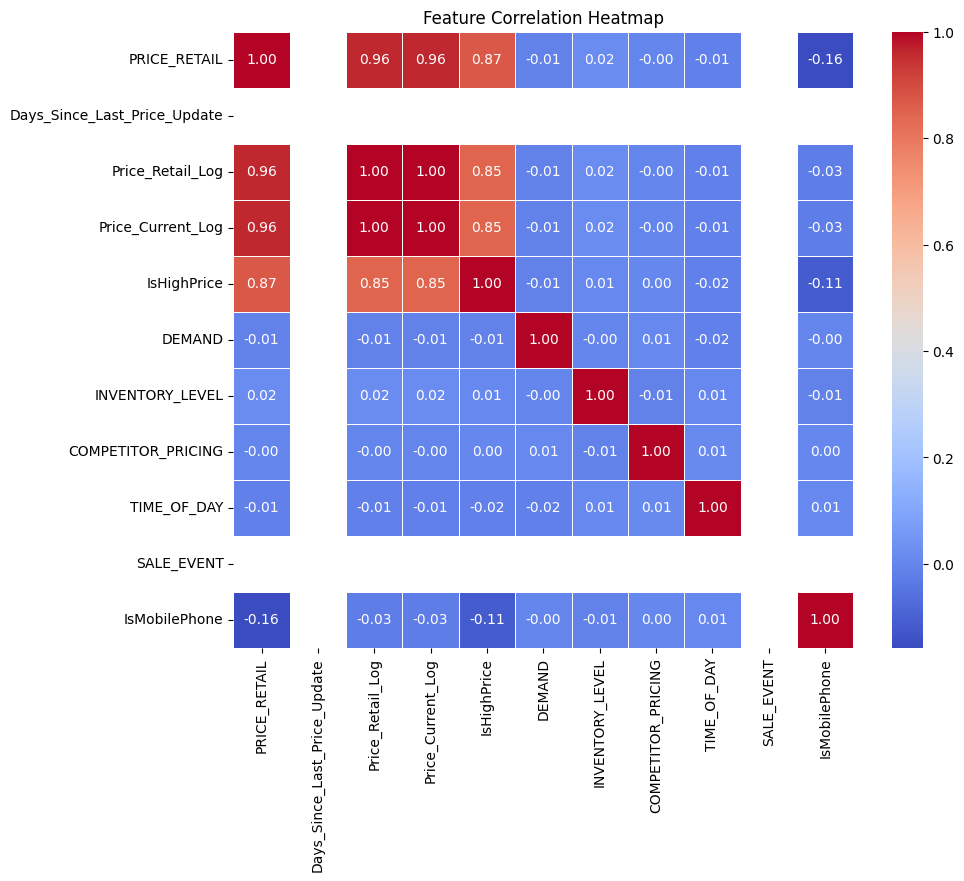

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()